# UCBE HW#9 
written by: Alexander Lam

In [91]:
# Dependencies
import pandas as pd
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import os
# SQL Alchemy
from sqlalchemy import func, extract
from sqlalchemy import create_engine
from sqlalchemy.orm import Session 
from sqlalchemy.ext.automap import automap_base
Base = automap_base()

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite')
Base = automap_base()
Base.prepare(engine, reflect = True)
session = Session(bind=engine)

In [3]:
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station

# Precipitation Analysis

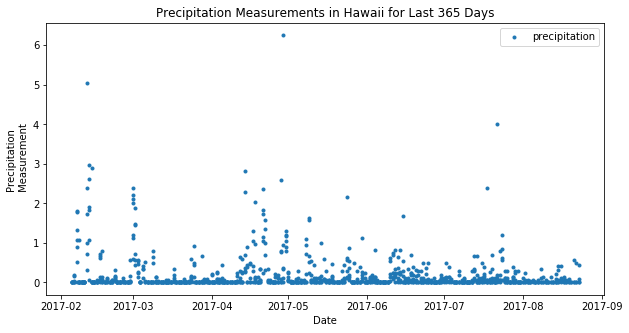

In [82]:
DAYS_IN_YEAR = 365
query_result = session.query(Measurement.date,Measurement.prcp).filter(
    Measurement.date > (date.today()-timedelta(days = DAYS_IN_YEAR))).order_by(Measurement.date).all()

dates = [entry[0] for entry in query_result]
prcp = [entry[1] for entry in query_result]
precipitation = pd.DataFrame({'date' : dates, 'prcp' : prcp})
plt.figure(figsize = [10,5])
plt.plot(precipitation['date'],precipitation['prcp'],'.',label='precipitation')
plt.title(f'Precipitation Measurements in Hawaii for Last {DAYS_IN_YEAR} Days')
plt.ylabel('Precipitation \n Measurement')
plt.legend()
plt.xlabel('Date')
plt.show()DAYS_IN_YEAR = 365
query_result = session.query(Measurement.date,Measurement.prcp).filter(
    Measurement.date > (date.today()-timedelta(days = DAYS_IN_YEAR))).order_by(Measurement.date).all()

dates = [entry[0] for entry in query_result]
prcp = [entry[1] for entry in query_result]
precipitation = pd.DataFrame({'date' : dates, 'prcp' : prcp})
plt.figure(figsize = [10,5])
plt.plot(precipitation['date'],precipitation['prcp'],'.',label='precipitation')
plt.title(f'Precipitation Measurements in Hawaii for Last {DAYS_IN_YEAR} Days')
plt.ylabel('Precipitation \n Measurement')
plt.legend()
plt.xlabel('Date')
plt.show()

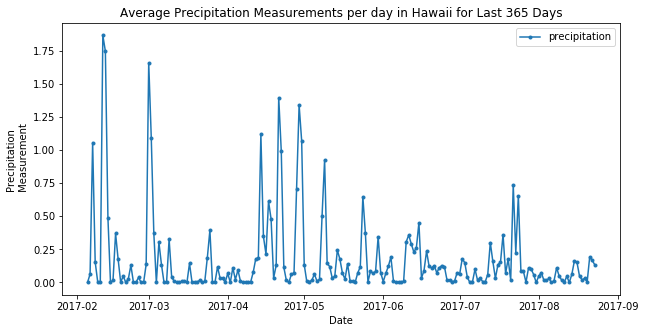

In [84]:
query_result = session.query(Measurement.date,func.avg(Measurement.prcp)).filter(
    Measurement.date > (date.today()-timedelta(days = DAYS_IN_YEAR))).group_by(
    Measurement.date).order_by(Measurement.date).all()

dates = [entry[0] for entry in query_result]
prcp = [entry[1] for entry in query_result]
precipitation = pd.DataFrame({'date' : dates, 'prcp' : prcp})
plt.figure(figsize = [10,5])
plt.plot(precipitation['date'],precipitation['prcp'],'.-',label='precipitation')
plt.title(f'Average Precipitation Measurements per day in Hawaii for Last {DAYS_IN_YEAR} Days')
plt.ylabel('Precipitation \n Measurement')
plt.legend()
plt.xlabel('Date')
plt.show()

# Station Analysis

Station list by Activity

In [20]:
query_result = session.query(Measurement.station,func.count(Measurement.station)).filter(
    Measurement.date > (date.today()-timedelta(days = DAYS_IN_YEAR))).group_by(
    Measurement.station).order_by(func.count(Measurement.station).desc()).all()
counter = 1
for station in query_result:
    print('%s. %s: %s' % (counter,station[0],station[1]))
    counter += 1

1. USC00519397: 195
2. USC00519281: 186
3. USC00513117: 177
4. USC00516128: 171
5. USC00519523: 167
6. USC00514830: 143
7. USC00517948: 34


Frequency of Measurement for most active station

In [21]:
most_active = session.query(Measurement.station,func.count(Measurement.station)).filter(
    Measurement.date > (date.today()-timedelta(days = DAYS_IN_YEAR))).group_by(
    Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]
most_active

'USC00519397'

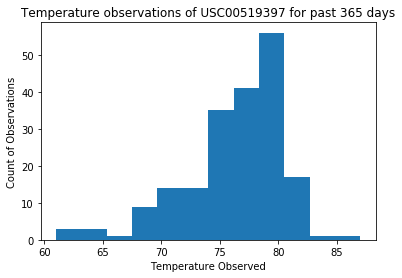

In [23]:
tobs = session.query(Measurement.tobs).filter(Measurement.station == most_active).filter(
    Measurement.date > (date.today()-timedelta(days = DAYS_IN_YEAR))).all()
# convert tuples to list
tobs = [obs[0] for obs in tobs] 
plt.hist(tobs,12)
plt.title(f'Temperature observations of {most_active} for past {DAYS_IN_YEAR} days')
plt.ylabel('Count of Observations')
plt.xlabel('Temperature Observed')
plt.show()

# Temperature Analysis

In [99]:
def calc_temps(start_date_str, end_date_str = datetime.strftime(date.today(),'%Y-%m-%d')):
#     date format: %Y-%m-%d
    start_date = datetime.strptime(start_date_str,'%Y-%m-%d')
    end_date = datetime.strptime(end_date_str,'%Y-%m-%d')
    query_result = session.query(func.min(Measurement.tobs),
                                 func.max(Measurement.tobs),
                                 func.avg(Measurement.tobs)).filter( 
                                Measurement.date.between(start_date, end_date)).all()
    return query_result

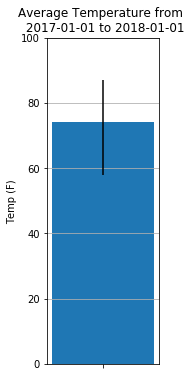

In [100]:
start = '2017-01-01'
end = '2018-01-01'
(min_t,max_t,avg_t) = calc_temps(start,end)[0]
plt.figure(figsize = [2,6])
plt.bar(0,avg_t, tick_label = '')
plt.errorbar(0, (max_t + min_t)/2, yerr = (max_t - min_t)/2, color = 'k')
plt.ylim([0,100])
plt.ylabel('Temp (F)')
plt.grid(True, axis = 'y')
plt.title(f'Average Temperature from \n {start} to {end}')
plt.show()

# Other Analysis

In [96]:
def daily_normals(query_date_str):
#     date format: %m-%d
    query_date = datetime.strptime(query_date_str,'%m-%d')
    query_result = session.query(func.min(Measurement.tobs),
                                 func.max(Measurement.tobs),
                                 func.avg(Measurement.tobs)).filter(
        extract('day', Measurement.date) == query_date.day).filter(
        extract('month', Measurement.date) == query_date.month).all()
    return query_result[0]

In [97]:
daily_normals('01-01')

(62.0, 77.0, 69.06)